# **Logistic Regression with impact of variation in Threshold**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer # dataset

from sklearn.linear_model import LogisticRegression # model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.metrics import (precision_recall_curve, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report)

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Stratified K Fold Cross Validation**

In [4]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr = LogisticRegression(max_iter=5000) # our model

cv_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")

Cross-validated accuracy scores: [0.96703297 0.91208791 0.95604396 0.96703297 0.94505495]
Mean CV accuracy: 0.9495


In [5]:
# model training
lr.fit(X_train, y_train)

# Predicting the probability estimates for the test data
y_probs = lr.predict_proba(X_test)[:, 1]

# Predict the class labels using default threshold of 0.5
y_pred_default = (y_probs >= 0.5).astype(int)

**Performance Metrics at default threshold of 0.5**

In [6]:
print("\n---Performance at default threshold 0.5---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_default):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_default):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_default):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_probs):.4f}")

# classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_default))


---Performance at default threshold 0.5---
Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1 Score: 0.9655
ROC-AUC: 0.9977

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**Precision-Recall Curve**

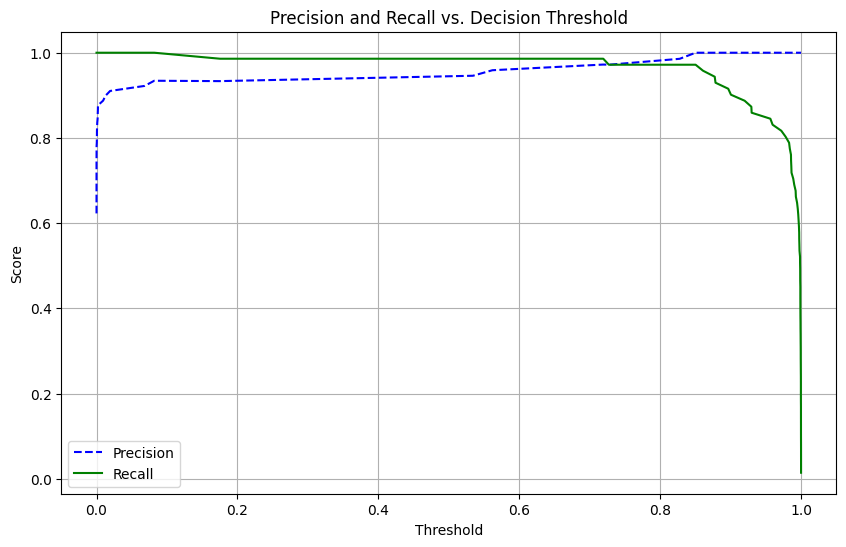

In [7]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()

**ROC curve**

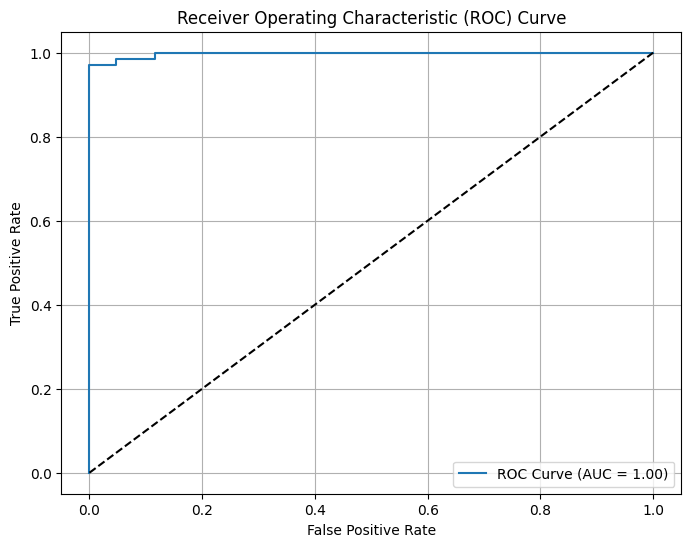

In [8]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Confusion matrix**

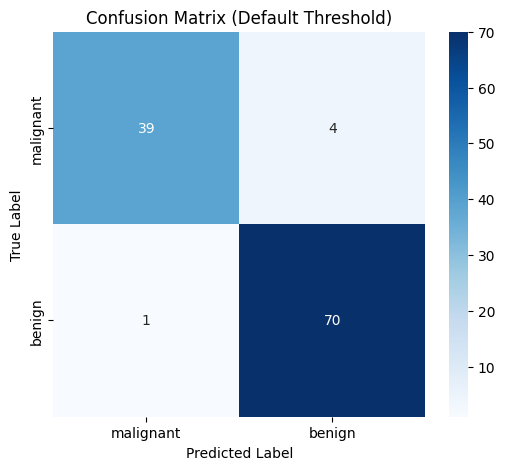

In [9]:
cm = confusion_matrix(y_test, y_pred_default)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Default Threshold)')
plt.show()

**Best Threshold**

In [10]:
# Higher F1 indicates a better balance between precision and recall
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

# Identify threshold corresponding to highest F1 Score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

**Re-evaluated Model at Best Threshold**


---Performance at Best Threshold---
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9718
F1 Score: 0.9857
ROC-AUC: 0.9977


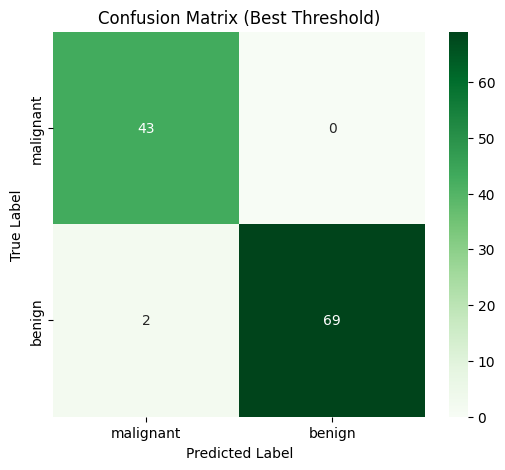

In [11]:
y_pred_best = (y_probs >= best_threshold).astype(int)

print("\n---Performance at Best Threshold---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_probs):.4f}")

# --- 12. Confusion Matrix at Best Threshold ---
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Best Threshold)')
plt.show()